<a href="https://colab.research.google.com/github/BoboSamson/BoboSamson/blob/main/Directed_Acyclic_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F

def forward_backward(x1, x2, dE_dy):
    # Convert inputs to tensors with requires_grad=True for autograd tracking
    x1 = torch.tensor(x1, dtype=torch.float32, requires_grad=True)
    x2 = torch.tensor(x2, dtype=torch.float32, requires_grad=True)
    x2 = torch.tensor(x2, dtype=torch.float32, requires_grad=True)

    # Sigmoid layer
    i1 = torch.sigmoid(x1)
    i2 = torch.sigmoid(x2)

    # Min and Max layers
    o_min = torch.min(i1, i2)
    o_max = torch.max(i1, i2)

    # Summation layer
    y = o_min + o_max

    # Compute gradient using backward pass
    y.backward(torch.tensor(dE_dy, dtype=torch.float32))

    # Return gradients
    return x1.grad.item(), x2.grad.item()

# Example usage
x1_val = 0.5   # Example input value
x2_val = -0.7  # Example input value
dE_dy_val = 1.0  # Example gradient from upstream

dE_dx1, dE_dx2 = forward_backward(x1_val, x2_val, dE_dy_val)
print(f"dE/dx1: {dE_dx1}")
print(f"dE/dx2: {dE_dx2}")


<ipython-input-1-eadfcd980e65>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2 = torch.tensor(x2, dtype=torch.float32, requires_grad=True)


dE/dx1: 0.23500370979309082
dE/dx2: 0.2217128723859787


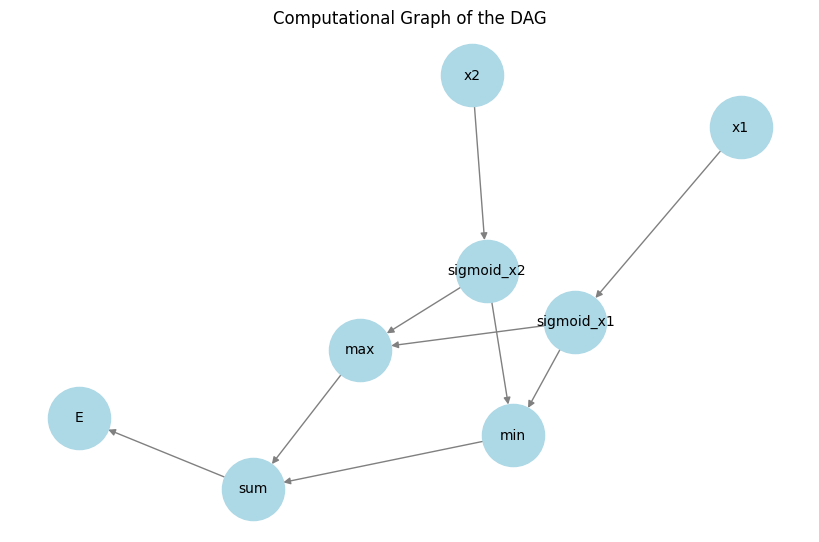

In [4]:
import networkx as nx
import matplotlib.pyplot as plt # Import pyplot correctly

def visualize_dag():
    G = nx.DiGraph()
    edges = [("x1", "sigmoid_x1"), ("x2", "sigmoid_x2"),
             ("sigmoid_x1", "min"), ("sigmoid_x2", "min"),
             ("sigmoid_x1", "max"), ("sigmoid_x2", "max"),
             ("min", "sum"), ("max", "sum"),
             ("sum", "E")]

    G.add_edges_from(edges)

    plt.figure(figsize=(8, 5))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    plt.title("Computational Graph of the DAG")
    plt.show()

visualize_dag() # Call the function with the correct name